<a href="https://colab.research.google.com/github/sammix95/Sammix/blob/master/ENews_Express_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project Business Statistics: E-news Express


## Business Context

The advent of e-news, or electronic news, portals has offered us a great opportunity to quickly get updates on the day-to-day events occurring globally. The information on these portals is retrieved electronically from online databases, processed using a variety of software, and then transmitted to the users. There are multiple advantages of transmitting new electronically, like faster access to the content and the ability to utilize different technologies such as audio, graphics, video, and other interactive elements that are either not being used or aren’t common yet in traditional newspapers.

E-news Express, an online news portal, aims to expand its business by acquiring new subscribers. With every visitor to the website taking certain actions based on their interest, the company plans to analyze these actions to understand user interests and determine how to drive better engagement.  The executives at E-news Express are of the opinion that there has been a decline in new monthly subscribers compared to the past year because the current webpage is not designed well enough in terms of the outline & recommended content to keep customers engaged long enough to make a decision to subscribe.

[Companies often analyze user responses to two variants of a product to decide which of the two variants is more effective. This experimental technique, known as A/B testing, is used to determine whether a new feature attracts users based on a chosen metric.]


## Objective

The design team of the company has researched and created a new landing page that has a new outline & more relevant content shown compared to the old page. In order to test the effectiveness of the new landing page in gathering new subscribers, the Data Science team conducted an experiment by randomly selecting 100 users and dividing them equally into two groups. The existing landing page was served to the first group (control group) and the new landing page to the second group (treatment group). Data regarding the interaction of users in both groups with the two versions of the landing page was collected. Being a data scientist in E-news Express, you have been asked to explore the data and perform a statistical analysis (at a significance level of 5%) to determine the effectiveness of the new landing page in gathering new subscribers for the news portal by answering the following questions:

1. Do the users spend more time on the new landing page than on the existing landing page?

2. Is the conversion rate (the proportion of users who visit the landing page and get converted) for the new page greater than the conversion rate for the old page?

3. Does the converted status depend on the preferred language? [Hint: Create a contingency table using the pandas.crosstab() function]

4. Is the time spent on the new page the same for the different language users?


## Data Dictionary

The data contains information regarding the interaction of users in both groups with the two versions of the landing page.

1. user_id - Unique user ID of the person visiting the website

2. group - Whether the user belongs to the first group (control) or the second group (treatment)

3. landing_page - Whether the landing page is new or old

4. time_spent_on_the_page - Time (in minutes) spent by the user on the landing page

5. converted - Whether the user gets converted to a subscriber of the news portal or not

6. language_preferred - Language chosen by the user to view the landing page

## Let's start!

### Import all the necessary libraries

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

### Loading the dataset

In [10]:
e_news = pd.read_csv('abtest.csv')

## Explore the dataset and extract insights using Exploratory Data Analysis

### Data Overview

The initial steps to get an overview of any dataset is to: 
- observe the first few rows of the dataset, to check whether the dataset has been loaded properly or not
- get information about the number of rows and columns in the dataset
- find out the data types of the columns to ensure that data is stored in the preferred format and the value of each property is as expected.
- check the statistical summary of the dataset to get an overview of the numerical columns of the data

#### Displaying the first few rows of the dataset

In [11]:
e_news.head()

,user_id,group,landing_page,time_spent_on_the_page,converted,language_preferred
0,546592,control,old,3.48,no,Spanish
1,546468,treatment,new,7.13,yes,English
2,546462,treatment,new,4.40,no,Spanish
3,546567,control,old,3.02,no,French
4,546459,treatment,new,4.75,yes,Spanish


#### Displaying the last few rows of the dataset

In [12]:
e_news.tail()

,user_id,group,landing_page,time_spent_on_the_page,converted,language_preferred
95,546446,treatment,new,5.15,no,Spanish
96,546544,control,old,6.52,yes,English
97,546472,treatment,new,7.07,yes,Spanish
98,546481,treatment,new,6.20,yes,Spanish
99,546483,treatment,new,5.86,yes,English


#### Checking the shape of the dataset

In [13]:
e_news.shape

(100, 6)

#### Checking the data types of the columns for the dataset

In [14]:
e_news.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   user_id                 100 non-null    int64  
 1   group                   100 non-null    object 
 2   landing_page            100 non-null    object 
 3   time_spent_on_the_page  100 non-null    float64
 4   converted               100 non-null    object 
 5   language_preferred      100 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 4.8+ KB


#### Getting the statistical summary for the numerical variables

In [15]:
e_news[['user_id', 'time_spent_on_the_page']].describe()

,user_id,time_spent_on_the_page
count,100.000000,100.000000
mean,546517.000000,5.377800
std,52.295779,2.378166
min,546443.000000,0.190000
25%,546467.750000,3.880000
50%,546492.500000,5.415000
75%,546567.250000,7.022500
max,546592.000000,10.710000


#### Getting the statistical summary for the categorical variables

In [16]:
e_news[['group','landing_page','converted','language_preferred']].describe()

,group,landing_page,converted,language_preferred
count,100,100,100,100
unique,2,2,2,3
top,control,old,yes,Spanish
freq,50,50,54,34


### Check for missing values

In [18]:
 e_news.isnull()

,user_id,group,landing_page,time_spent_on_the_page,converted,language_preferred
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False
...,...,...,...,...,...,...
95,False,False,False,False,False,False
96,False,False,False,False,False,False
97,False,False,False,False,False,False
98,False,False,False,False,False,False


### Check for duplicates

In [19]:
e_news.duplicated(keep=False)

0     False
1     False
2     False
3     False
4     False
      ...  
95    False
96    False
97    False
98    False
99    False
Length: 100, dtype: bool

### Univariate Analysis

#### Time spent on the page

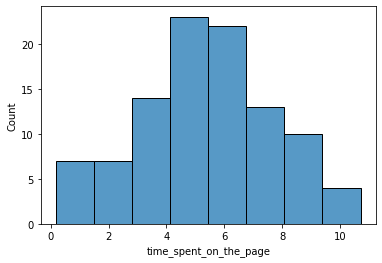

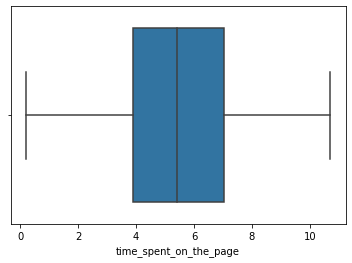

In [20]:
import seaborn as sns
sns.histplot(data=e_news,x='time_spent_on_the_page')
plt.show()
sns.boxplot(data=e_news,x='time_spent_on_the_page')
plt.show()

#### Group

In [21]:
e_news['group'].value_counts()

control      50
treatment    50
Name: group, dtype: int64

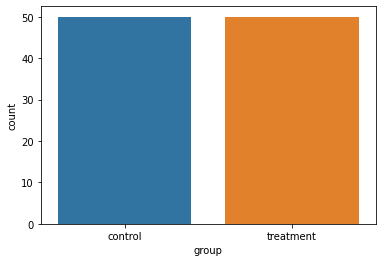

In [22]:
sns.countplot(data=e_news,x='group')
plt.show()

#### Landing page

In [23]:
e_news['landing_page'].value_counts()

old    50
new    50
Name: landing_page, dtype: int64

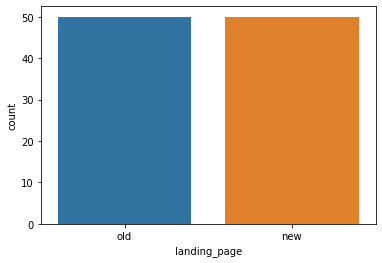

In [24]:
sns.countplot(data=e_news,x='landing_page')
plt.show()

#### Converted

In [25]:
e_news['converted'].value_counts()

yes    54
no     46
Name: converted, dtype: int64

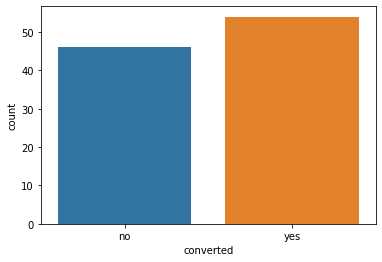

In [28]:
sns.countplot(data=e_news,x='converted')
plt.show()

#### Language preferred

In [29]:
e_news['language_preferred'].value_counts()

Spanish    34
French     34
English    32
Name: language_preferred, dtype: int64

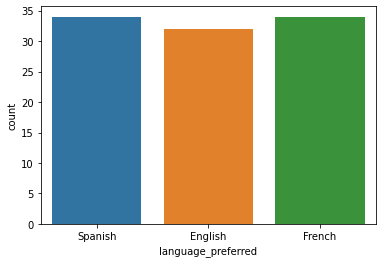

In [31]:
sns.countplot(data=e_news,x='language_preferred')
plt.show()

### Bivariate Analysis

#### Landing page vs Time spent on the page

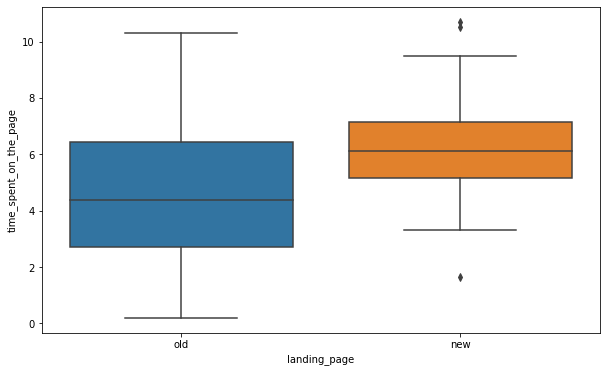

In [32]:
plt.figure(figsize=(10,6))
sns.boxplot(data=e_news,x='landing_page',y='time_spent_on_the_page')
plt.show()

#### Conversion status vs Time spent on the page

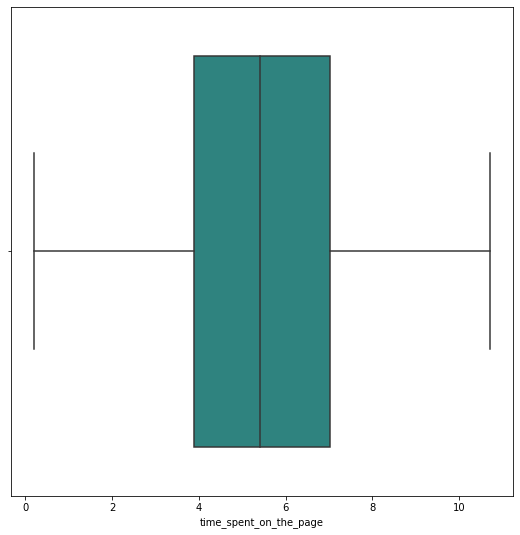

In [36]:
plt.figure(figsize=(9, 9))
sns.boxplot(data = e_news, x ='time_spent_on_the_page', hue ='converted', palette = 'viridis')
plt.show()


#### Language preferred vs Time spent on the page

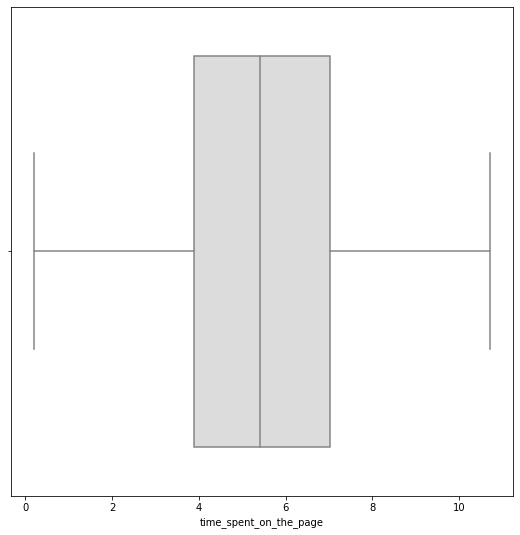

In [37]:
plt.figure(figsize=(9, 9))
sns.boxplot(data = e_news, x = 'time_spent_on_the_page', hue = 'language_preferred', palette = 'coolwarm')
plt.show()

## 1. Do the users spend more time on the new landing page than the existing landing page?

### Perform Visual Analysis

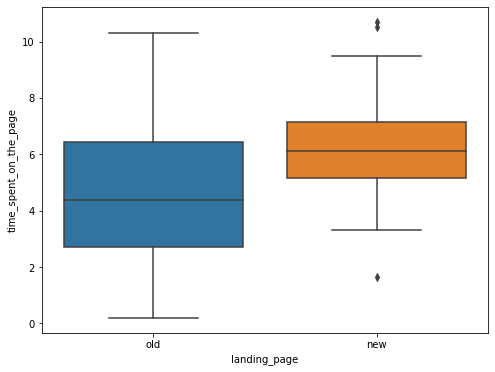

In [39]:
plt.figure(figsize=(8,6))
sns.boxplot(x = 'landing_page', y = 'time_spent_on_the_page', data = e_news)
plt.show()

### Step 1: Define the null and alternate hypotheses

$H_0$: mean time spent on old page = mean time spent on new page

$H_a$: mean time spent on old page > mean time spent on new page



### Step 2: Select Appropriate test

This is a one-tailed test concerning two population means from two independent populations. The population standard deviations are unknown. **Based on this information, select the appropriate test**.

### Step 3: Decide the significance level

As given in the problem statement, we select $\alpha = 0.05$.

### Step 4: Collect and prepare data

In [41]:
# create subsetted data frame for new landing page users 
time_spent_new = e_news[df['landing_page'] == 'new']['time_spent_on_the_page']

# create subsetted data frame for old landing page users
time_spent_old = e_news[df['landing_page'] == 'old']['time_spent_on_the_page']

In [42]:
print('The sample standard deviation of the time spent on the new page is:', round(time_spent_new.std(),2))
print('The sample standard deviation of the time spent on the old page is:', round(time_spent_old.std(),2))

The sample standard deviation of the time spent on the new page is: 1.82
The sample standard deviation of the time spent on the old page is: 2.58


**Based on the sample standard deviations of the two groups, decide whether the population standard deviations can be assumed to be equal or unequal**.

### Step 5: Calculate the p-value

In [45]:
from scipy.stats import ttest_ind

#calculate the p-value
test_stat, p_value =  ttest_ind(time_spent_new, time_spent_old, equal_var = True)

print('The p-value is', p_value)

The p-value is 0.000263224705619001


### Step 6: Compare the p-value with $\alpha$

In [ ]:
# print the conclusion based on p-value
if p_value < 0.05:
    print(f'As the p-value {p_value} is less than the level of significance, we reject the null hypothesis.')
else:
    print(f'As the p-value {p_value} is greater than the level of significance, we fail to reject the null hypothesis.')

As the p-value 0.000263224705619001 is less than the level of significance, we reject the null hypothesis.


### Step 7:  Draw inference

The mean time spent on the old page is greater than the mean time spent on the new page.



## 2. Is the conversion rate (the proportion of users who visit the landing page and get converted) for the new page greater than the conversion rate for the old page?

### Perform Visual Analysis

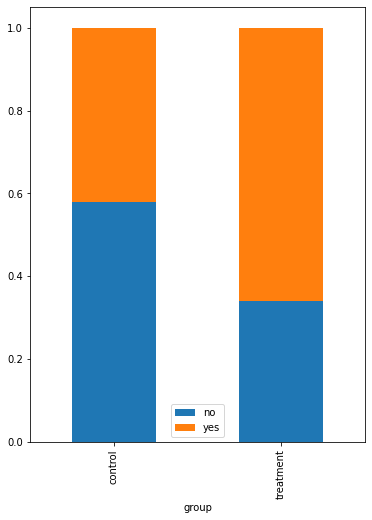

In [46]:
# Visually comparing the conversion rate for the new page and the conversion rate for the old page
pd.crosstab(e_news['group'],e_news['converted'],normalize='index').plot(kind="bar", figsize=(6,8),stacked=True)
plt.legend()
plt.show()

### Step 1: Define the null and alternate hypotheses

$H_0:$ Conversion rate for the old page = conversion rate for the new page

$H_a:$ Conversion rate for the old page > Conversion rate for the new page



### Step 2: Select Appropriate test

This is a one-tailed test concerning two population proportions from two independent populations. **Based on this information, select the appropriate test**.

### Step 3: Decide the significance level

As given in the problem statement, we select α = 0.05.

### Step 4: Collect and prepare data

In [49]:
# calculate the number of converted users in the treatment group
new_converted = e_news[e_news['group'] == 'treatment']['converted'].value_counts()['yes']
# calculate the number of converted users in the control group
old_converted = e_news[e_news['group'] == 'control']['converted'].value_counts()['yes'] 

n_control = e_news.group.value_counts()['control'] # total number of users in the control group
n_treatment = e_news.group.value_counts()['treatment'] # total number of users in the treatment group

print('The numbers of users served the new and old pages are {0} and {1} respectively'.format(n_control, n_treatment ))

The numbers of users served the new and old pages are 50 and 50 respectively


### Step 5: Calculate the p-value

In [51]:
# import the required function
from statsmodels.stats.proportion import proportions_ztest   

# calculate the p-value
test_stat, p_value = proportions_ztest([new_converted, old_converted] , [n_treatment, n_control], alternative = 'two-sided')

print('The p-value is', p_value)

The p-value is 0.016052616408112556


### Step 6: Compare the p-value with $\alpha$

In [ ]:
# print the conclusion based on p-value
if p_value < 0.05:
    print(f'As the p-value {p_value} is less than the level of significance, we reject the null hypothesis.')
else:
    print(f'As the p-value {p_value} is greater than the level of significance, we fail to reject the null hypothesis.')

As the p-value 0.016052616408112556 is less than the level of significance, we reject the null hypothesis.


### Step 7:  Draw inference

This means that our alternate hypothesis $H_a$ was accepted and the conversion rate for the old page is greater than the conversion rate for the new page.






## 3. Does the converted status depend on the preferred language?

### Perform Visual Analysis

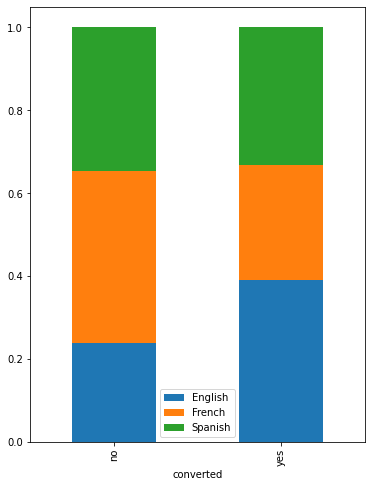

In [52]:
# Visually plot the dependency between conversion status and preferred langauge
pd.crosstab(e_news['converted'],e_news['language_preferred'],normalize='index').plot(kind="bar", figsize=(6,8), stacked=True)
plt.legend()
plt.show()


### Step 1: Define the null and alternate hypotheses

$H_0:$ Converted status doesn't depend on the preferred language

$H_a:$ Converted status depends on the preferred language



### Step 2: Select Appropriate test

This is a problem of the test of independence, concerning two categorical variables - converted status and preferred language. **Based on this information, select the appropriate test.**

### Step 3: Decide the significance level

As given in the problem statement, we select α = 0.05.

### Step 4: Collect and prepare data

In [53]:
contingency_table = pd.crosstab(e_news['converted'], e_news['language_preferred'])  
contingency_table

language_preferred,English,French,Spanish
converted,,,
no,11,19,16
yes,21,15,18


### Step 5: Calculate the p-value

In [55]:
# import the required function
from scipy.stats import chi2_contingency  

# calculate the p-value
chi2, p_value, dof, exp_freq = chi2_contingency(contingency_table) 

print('The p-value is', p_value)

The p-value is 0.21298887487543447


### Step 6: Compare the p-value with $\alpha$

In [56]:
# print the conclusion based on p-value
if p_value < 0.05:
    print(f'As the p-value {p_value} is less than the level of significance, we reject the null hypothesis.')
else:
    print(f'As the p-value {p_value} is greater than the level of significance, we fail to reject the null hypothesis.')

As the p-value 0.21298887487543447 is greater than the level of significance, we fail to reject the null hypothesis.


### Step 7:  Draw inference

From the analysis, the converted status does not depend on the preferred language.



## 4. Is the time spent on the new page same for the different language users?

### Perform Visual Analysis

In [57]:
# create a new DataFrame for users who got served the new page
df_new = e_news[e_news['landing_page'] == 'new']

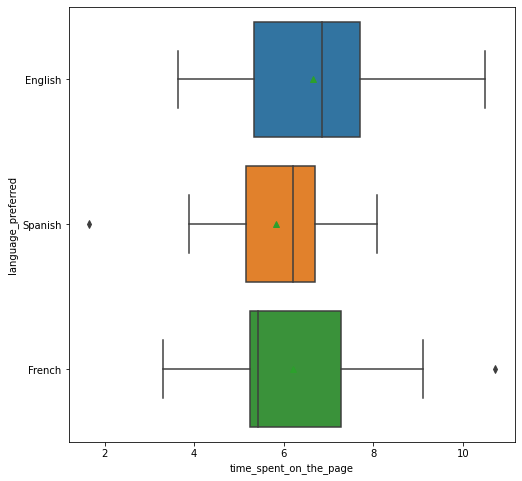

In [58]:
# Visually plot the time spent on the new page for different language users
plt.figure(figsize=(8,8))
sns.boxplot(x = 'time_spent_on_the_page', y = 'language_preferred', showmeans = True, data = df_new)
plt.show()


In [59]:
# Calculate the mean time spent on the new page for different language users
df_new.groupby(['language_preferred'])['time_spent_on_the_page'].mean()


language_preferred
English    6.663750
French     6.196471
Spanish    5.835294
Name: time_spent_on_the_page, dtype: float64

### Step 1: Define the null and alternate hypotheses

$H_0:$ Time spent on the new page is same for all language users

$H_a:$ Time spent on the new page is different for all language users



### Step 2: Select Appropriate test

This is a problem, concerning three population means. **Based on this information, select the appropriate test to compare the three population means.**

### Step 3: Decide the significance level

As given in the problem statement, we select α = 0.05.

### Step 4: Collect and prepare data

In [62]:
# create a subsetted data frame of the time spent on the new page by English language users 
time_spent_English = df_new[df_new['language_preferred']=="English"]['time_spent_on_the_page']

# create subsetted data frames of the time spent on the new page by French and Spanish language users
time_spent_French = df_new[df_new['language_preferred']=='French']['time_spent_on_the_page'] 
time_spent_Spanish = df_new[df_new['language_preferred']=='Spanish']['time_spent_on_the_page'] 


### Step 5: Calculate the p-value

In [65]:
# import the required function
from scipy.stats import f_oneway 

# calculate the p-value
test_stat, p_value = f_oneway(time_spent_English, time_spent_French, time_spent_Spanish)

print('The p-value is', p_value)

The p-value is 0.43204138694325955


### Step 6: Compare the p-value with $\alpha$

In [ ]:
# print the conclusion based on p-value
if p_value < 0.05:
    print(f'As the p-value {p_value} is less than the level of significance, we reject the null hypothesis.')
else:
    print(f'As the p-value {p_value} is greater than the level of significance, we fail to reject the null hypothesis.')

As the p-value 0.43204138694325955 is greater than the level of significance, we fail to reject the null hypothesis.


### Step 7:  Draw inference

The time spent on the new page is same for all the language users.



## Conclusion and Business Recommendations


<ul>
<h3><b>Conclusion</b></h3>
<li>Users spent more time on the old page than the new page.</li>
<li>The converted rate for the old page is greater than the converted rate for the new page.</li>
<li>The conversion rate does not depend on the preferred language and the time spent on the new page is the same for the different language users.</li>
<h3><b>Business Recommendations</b></h3>
<li>The Company should focus on the old page or make the new page more user-friendly and easy for the users to navigate through.</li>
</ul> 

## Now let's explore and predict if a user will subscribe to the Company or not (using logistic regression algorithm).

In [89]:
e_news.head()

,user_id,group,landing_page,time_spent_on_the_page,converted,language_preferred,old,yes
0,546592,control,old,3.48,no,Spanish,1,0
1,546468,treatment,new,7.13,yes,English,0,1
2,546462,treatment,new,4.40,no,Spanish,0,0
3,546567,control,old,3.02,no,French,1,0
4,546459,treatment,new,4.75,yes,Spanish,0,1


In [90]:
e_news.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   user_id                 100 non-null    int64  
 1   group                   100 non-null    object 
 2   landing_page            100 non-null    object 
 3   time_spent_on_the_page  100 non-null    float64
 4   converted               100 non-null    object 
 5   language_preferred      100 non-null    object 
 6   old                     100 non-null    uint8  
 7   yes                     100 non-null    uint8  
dtypes: float64(1), int64(1), object(4), uint8(2)
memory usage: 5.0+ KB


In [91]:
e_news.describe()

,user_id,time_spent_on_the_page,old,yes
count,100.000000,100.000000,100.000000,100.000000
mean,546517.000000,5.377800,0.500000,0.540000
std,52.295779,2.378166,0.502519,0.500908
min,546443.000000,0.190000,0.000000,0.000000
25%,546467.750000,3.880000,0.000000,0.000000
50%,546492.500000,5.415000,0.500000,1.000000
75%,546567.250000,7.022500,1.000000,1.000000
max,546592.000000,10.710000,1.000000,1.000000


In [92]:
# create a dummy to convert the categorical column into quantiative dataset
Landing = pd.get_dummies(e_news['landing_page'], drop_first = True)

In [113]:
# create a dummy to convert the categorical column into quantiative dataset
#Convert = pd.get_dummies(e_news['converted'], drop_first = True)

In [114]:
# attached the new columns to the dataframe
e_news = pd.concat([e_news,Landing,Convert], axis=1)

In [118]:
# removes any duplicated column
e_news = e_news.T.drop_duplicates().T

In [119]:
# View the first five rows
e_news.head()

,user_id,group,landing_page,time_spent_on_the_page,converted,language_preferred,old,yes
0,546592,control,old,3.48,no,Spanish,1,0
1,546468,treatment,new,7.13,yes,English,0,1
2,546462,treatment,new,4.4,no,Spanish,0,0
3,546567,control,old,3.02,no,French,1,0
4,546459,treatment,new,4.75,yes,Spanish,0,1


In [139]:
# select your X and y variables 
X = e_news.drop(['yes','user_id','group','landing_page','converted','language_preferred'], axis=1)
y = e_news['yes'].astype('int') # your y variable must be an integer

In [140]:
# import your train_test_split model
from sklearn.model_selection import train_test_split

In [141]:
# split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [142]:
# import your Logistic Regression model
from sklearn.linear_model import LogisticRegression

logmodel = LogisticRegression()

In [143]:
# fit your dataset into your model and train your dataset
logmodel.fit(X_train, y_train)

LogisticRegression()

In [144]:
# compute your predictions and test it.
predictions = logmodel.predict(X_test)

In [145]:
# import the classification_report and the confusion_matrix model
from sklearn.metrics import classification_report, confusion_matrix

In [146]:
print(classification_report(y_test,predictions))
print(confusion_matrix(y_test,predictions))

              precision    recall  f1-score   support

           0       0.84      0.89      0.86        18
           1       0.86      0.80      0.83        15

    accuracy                           0.85        33
   macro avg       0.85      0.84      0.85        33
weighted avg       0.85      0.85      0.85        33

[[16  2]
 [ 3 12]]


## Reviews are welcomed!